In [1]:
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from utils import calculate_income_1000_customers
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
TRAIN_SIZE = 0.8

# Extra Tree Classifier

In [3]:
np.random.seed(0)
X = pd.read_csv('../data/x_train.txt', sep=' ', header=None).to_numpy()
y = pd.read_csv('../data/y_train.txt', sep=' ', header=None).to_numpy().ravel()

## Grid Search for different feature sets

In [4]:
param_grid = {
    'n_estimators': [25, 50, 100, 150, 200],
    'max_depth': [None, 10, 15, 20],
    'min_samples_split': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 3],
    'bootstrap': [False, True]
}

model = GridSearchCV(estimator=ExtraTreesClassifier(random_state=0), param_grid=param_grid, cv=5, scoring='accuracy')

In [5]:
num_features = [2, 3, 4, 5]

accuracies = {n: [] for n in num_features} 
accuracies_top = {n: [] for n in num_features} 
income = {n: [] for n in num_features} 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)

for n in num_features:
    selected = [100 + i for i in range(1, n+1)]
    print("Features: ", selected)

    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top[n].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income[n].append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies[n].append(accuracy_score(y_test, y_pred))

    print("Params: ", model.best_params_)

Features:  [101, 102]
Params:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 25}
Features:  [101, 102, 103]
Params:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 6, 'n_estimators': 25}
Features:  [101, 102, 103, 104]
Params:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}
Features:  [101, 102, 103, 104, 105]
Params:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 100}


In [6]:
avg_accuracies = [np.mean(accuracies[n]) for n in num_features]
avg_accuracies_top = [np.mean(accuracies_top[n]) for n in num_features]
avg_income = [np.mean(income[n]) for n in num_features]

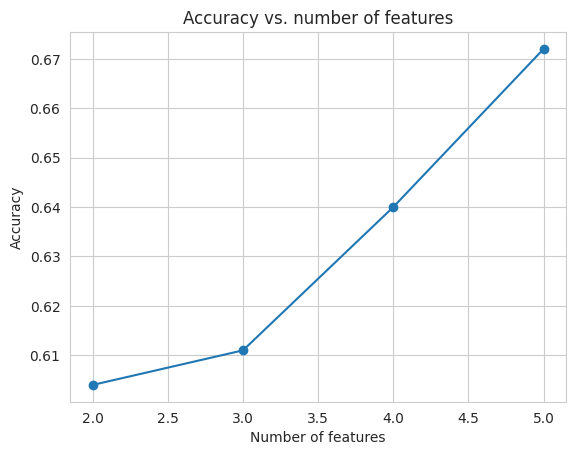

In [7]:
plt.plot(num_features, avg_accuracies, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. number of features')
plt.grid(True)
plt.show()

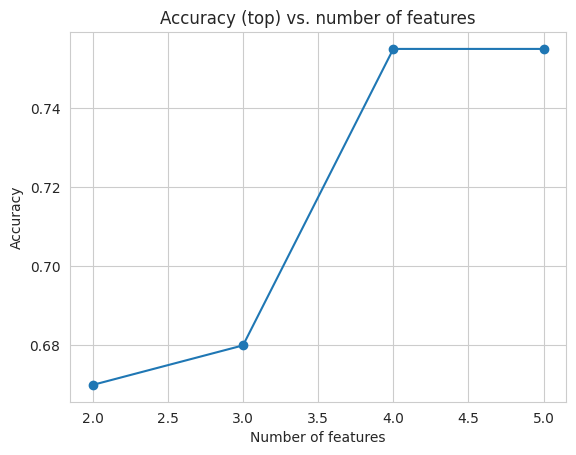

In [8]:
plt.plot(num_features, avg_accuracies_top, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('Accuracy (top) vs. number of features')
plt.grid(True)
plt.show()

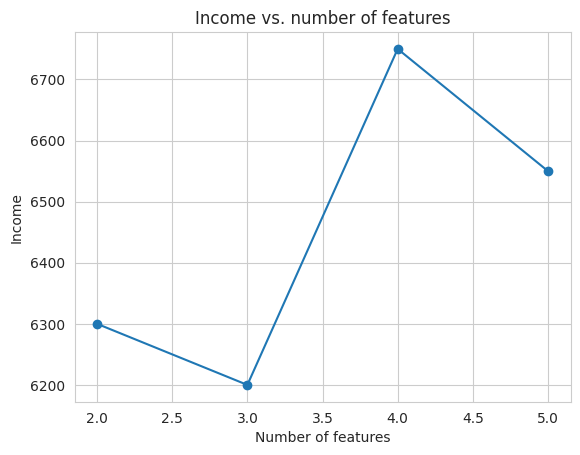

In [9]:
plt.plot(num_features, avg_income, marker='o')
plt.xlabel('Number of features')
plt.ylabel('Income')
plt.title('Income vs. number of features')
plt.grid(True)
plt.show()

In [10]:
print(max(avg_income))

6750.0


### Best performing feature set, many iterations

In [11]:
np.random.seed(0)

In [12]:
# Params:  {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
model = ExtraTreesClassifier(bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50)
accuracies = []
accuracies_top = []
income = []
for _ in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    selected = [101, 102, 103]

    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))

In [13]:
avg_accuracies = [np.mean(accuracies)]
avg_accuracies_top = [np.mean(accuracies_top)]
avg_income = [np.mean(income)]

In [14]:
print(avg_income)

[6793.15]


In [15]:
np.random.seed(0)

In [16]:
# Params:  {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 200}
model = ExtraTreesClassifier(bootstrap=True, max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=50)

accuracies = []
accuracies_top = []
income = []
for _ in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    selected = [101, 102, 103]

    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))

In [17]:
avg_accuracies = [np.mean(accuracies)]
avg_accuracies_top = [np.mean(accuracies_top)]
avg_income = [np.mean(income)]

In [18]:
print(avg_income)

[6793.15]


### Testing more grid parameters for best feature set

In [19]:
np.random.seed(0)

In [20]:
param_grid = {
    'n_estimators': [10, 30, 50, 100, 150, 200, 250],
    'max_depth': [None, 2, 5, 10, 15, 20, 25],
    'min_samples_split': [2, 3, 4, 5, 6, 8, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'bootstrap': [False, True]
}

model = GridSearchCV(estimator=ExtraTreesClassifier(random_state=0), param_grid=param_grid, cv=5, scoring='accuracy')

In [21]:
accuracies = []
accuracies_top = []
income = []

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)

selected = [101, 102, 103]

model.fit(X_train[:, selected], y_train)
y_pred = model.predict(X_test[:, selected])
y_proba = model.predict_proba(X_test[:, selected])

accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])

accuracies.append(accuracy_score(y_test, y_pred))

In [22]:
p = model.best_params_
p

{'bootstrap': True,
 'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

In [23]:
np.random.seed(0)

In [24]:
model = ExtraTreesClassifier(bootstrap=p['bootstrap'], max_depth=p['max_depth'], min_samples_leaf=p['min_samples_leaf'], min_samples_split=p['min_samples_split'], n_estimators=p['n_estimators'])

accuracies = []
accuracies_top = []
income = []
for _ in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=TRAIN_SIZE, shuffle=True)
    
    selected = [101, 102, 103]

    model.fit(X_train[:, selected], y_train)
    y_pred = model.predict(X_test[:, selected])
    y_proba = model.predict_proba(X_test[:, selected])
    
    accuracies_top.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[0]) 
    income.append(calculate_income_1000_customers(len(selected), y_proba=y_proba, y_true=y_test, y_pred=y_pred)[1])
    
    accuracies.append(accuracy_score(y_test, y_pred))

In [25]:
avg_accuracies = [np.mean(accuracies)]
avg_accuracies_top = [np.mean(accuracies_top)]
avg_income = [np.mean(income)]

In [26]:
print(avg_income)

[6844.55]
